# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [4]:
import pandas as pd
import numpy as np
import os.path
import re
# get the file names in fruit directory
#filenames = os.listdir("./assignment3_data/fruit")
# create a new dataframe
# http://stackoverflow.com/questions/27420263/pandas-parse-merged-header-columns-from-excel
# this website talked about how to merge two rows as header and two column as one element
# .fillna() function to fill na: axis = 0 means column and method = pad or ffill means fill na by using data from previous one. If 2 is na, fill na by using 1's value.
# .concat() axis = 1 equal to cbind; axis = 0 equal to rbind; default is 0; 
# .append() have similar function with concat
def filetidy(path,filenames,label):
    fdf = pd.DataFrame()
    for x in filenames:
        # skip the 1st row
        ft = pd.read_excel(path+"/"+x,skiprows=1,header=None)
        
        # for the header: the first two rows are all header. 
        for i in [3,4,6]:
            ft.iloc[0,i] = str(ft.iloc[0,i])+" "+str(ft.iloc[1,i])
        # change price to be price_per_lb
        #ft.iloc[0][1] = str(ft.iloc[0][1])+" "+str(ft.iloc[2][2])
        # size_per_lb
        #ft.iloc[0][4] = str(ft.iloc[0][4])+" "+str(ft.iloc[2][5])
        ft.iloc[0,2] = "price unit"
        ft.iloc[0,5] = "size unit"

        #change column names to the one I cleaned up
        ft.columns = ft.iloc[0]
        ft = ft.loc[2:]
    
        # choose the row that has "fresh";  fresh[2]: means the 3rd column; fresh["Form"]: means "Form" this column; fresh.loc[0]: the row whose index label is 0; .iloc: refers to index position; loc: refers to index label and it also accept boolean arraies
        #ft = ft.loc[ft["Form"]==label]  # ref: http://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value
        ft = ft.loc[ft["Form"].apply(lambda y: bool(re.match(label+".*",str(y))))] # use str(y) in case there y type is not a string
        ft["name"] = re.search("(.*).xlsx",x).group(1)
        # append the table with previous ones
        fdf = fdf.append(ft,ignore_index=True)
    #df_fresh = pd.concat(fresh,ignore_index=True)

    # delete the last two columns which are all nans
    fdf = fdf.ix[:,0:7]
    return(fdf)

In [5]:
path = "./assignment3_data/fruit"
label = "Fresh"
filenames = os.listdir("./assignment3_data/fruit")
fresh_fruit = filetidy(path,filenames,label)

In [6]:
fresh_fruit

,Average price per cup equivalent,Average retail price,Form,Preparation yield factor,Size of a cup equivalent,name,price unit
0,0.422373,1.56752,Fresh1,0.9,0.242508,apples,per pound
1,1.1891,3.04007,Fresh1,0.93,0.363763,apricots,per pound
2,0.292965,0.566983,Fresh1,0.64,0.330693,bananas,per pound
3,1.92292,5.77471,Fresh1,0.96,0.31967,blackberries,per pound
4,1.59318,4.73462,Fresh1,0.95,0.31967,blueberries,per pound
5,0.3938,0.535874,Fresh1,0.51,0.374786,cantaloupe,per pound
6,1.33455,3.59299,Fresh1,0.92,0.341717,cherries,per pound
7,0.848278,0.897802,Fresh1,0.49,0.462971,grapefruit,per pound
8,0.721266,2.09383,Fresh1,0.96,0.330693,grapes,per pound
9,0.649077,0.796656,Fresh1,0.46,0.374786,honeydew,per pound


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [7]:
# For vegetable
path = "./assignment3_data/vegetables"
label = "Fresh"
filenames = os.listdir("./assignment3_data/vegetables")
fresh_veg = filetidy(path,filenames,label)
fresh_veg

,Average price per cup equivalent,Average retail price,Form,Preparation yield factor,Size of a cup equivalent,name,price unit
0,1.15536,1.17225,Fresh1,0.458554,0.451948,acorn_squash,per pound
1,2.27497,2.21305,Fresh1,0.375309,0.385809,artichoke,per pound
2,2.58227,3.21349,Fresh1,0.493835,0.396832,asparagus,per pound
3,0.964886,2.23587,Fresh1,0.740753,0.31967,avocados,per pound
4,NaN,,Fresh,,,broccoli,NaN
5,0.890898,2.76355,Fresh1,1.06,0.341717,brussels_sprouts,per pound
6,0.787893,1.24474,Fresh1,0.714,0.451948,butternut_squash,per pound
7,0.245944,0.579208,Fresh green cabbage1,0.778797,0.330693,cabbage,per pound
8,0.448412,1.05645,Fresh red cabbage1,0.779107,0.330693,cabbage,per pound
9,NaN,NaN,Fresh,NaN,NaN,carrots,NaN


In [8]:
# For tomatoes
filenames = ["tomatoes.xlsx"]
path = "./assignment3_data/vegetables"
label = "Fresh"
filetidy(path,filenames,label)

,Form,Average retail price,price unit,Preparation yield factor,Size of a cup equivalent,size unit,Average price per cup equivalent
0,Fresh,NaN,NaN,NaN,NaN,NaN,NaN


<p> From the table above we can see that there is no price for tomatoes. <br> By taking a look at the tomatoes.xlsx file, we can know that there is only one cell for Form columns, and other cells are empty. Thus, our dataframe above is correct.<br> There are also many other files that have no price for fresh rows. For example "broccoli.xlsx".</p>

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [9]:
# Remove rows without a price from the vegetable data frame
fresh_veg_c = fresh_veg[pd.notnull(fresh_veg["price unit"])]
fresh_veg_c

,Average price per cup equivalent,Average retail price,Form,Preparation yield factor,Size of a cup equivalent,name,price unit
0,1.15536,1.17225,Fresh1,0.458554,0.451948,acorn_squash,per pound
1,2.27497,2.21305,Fresh1,0.375309,0.385809,artichoke,per pound
2,2.58227,3.21349,Fresh1,0.493835,0.396832,asparagus,per pound
3,0.964886,2.23587,Fresh1,0.740753,0.31967,avocados,per pound
5,0.890898,2.76355,Fresh1,1.06,0.341717,brussels_sprouts,per pound
6,0.787893,1.24474,Fresh1,0.714,0.451948,butternut_squash,per pound
7,0.245944,0.579208,Fresh green cabbage1,0.778797,0.330693,cabbage,per pound
8,0.448412,1.05645,Fresh red cabbage1,0.779107,0.330693,cabbage,per pound
12,0.650001,2.63084,Fresh1,1.16,0.286601,collard_greens,per pound
13,1.8125,2.69062,Fresh1,0.54,0.363763,corn_sweet,per pound


In [10]:
# combine the fruit and vegetable data frames
# adding a column that indicate the type of each dataframe
fresh = [fresh_fruit,fresh_veg_c]
fresh = pd.concat(fresh, keys = ["fruits","vegetables"])
fresh

Average price per cup equivalent Average retail price   \
fruits     0                          0.422373               1.56752   
           1                            1.1891               3.04007   
           2                          0.292965              0.566983   
           3                           1.92292               5.77471   
           4                           1.59318               4.73462   
           5                            0.3938              0.535874   
           6                           1.33455               3.59299   
           7                          0.848278              0.897802   
           8                          0.721266               2.09383   
           9                          0.649077              0.796656   
           10                          1.03797               2.04468   
           11                         0.705783               1.37756   
           12                         0.618667               1.76115   
           13                         0.578357               1.03517   
           14                         0.646174               1.29801   
           15                          0.56639               1.59119   
           16                          0.59074               1.46157   
           17                         0.447686              0.627662   
           18                         0.707176               1.82742   
           19                          1.32634               2.17359   
           20                          2.32287               6.97581   
           21                         0.802171               2.35881   
           22                         0.759471               1.37796   
           23                         0.212033              0.333412   
vegetables 0                           1.15536               1.17225   
           1                           2.27497               2.21305   
           2                           2.58227               3.21349   
           3                          0.964886               2.23587   
           5                          0.890898               2.76355   
           6                          0.787893               1.24474   
           7                          0.245944              0.579208   
           8                          0.448412               1.05645   
           12                         0.650001               2.63084   
           13                           1.8125               2.69062   
           14                         0.353448               1.29593   
           15                          0.46965               1.29593   
           16                         0.696606               2.13997   
           17                         0.455022               1.41036   
           18                         0.766262                2.8073   
           19                         0.309655               1.21304   
           22                         0.944032               2.56924   
           23                          1.47315               3.21355   
           24                         0.406868               1.03811   
           25                         0.184017               0.56432   
           26                         0.401618               1.31163   
           27                         0.734926               2.27794   
           29                          0.84548               1.63948   
           30                           0.4994              0.918897   
           32                          1.05353               2.47175   

                                     Form Preparation yield factor  \
fruits     0                       Fresh1                      0.9   
           1                       Fresh1                     0.93   
           2                       Fresh1                     0.64   
           3                      Fresh1                      0.96   
           4                       Fresh1                     0

In [15]:
# make sure all the variables are numerical, not a string
for y in fresh.columns:
    print fresh[y].dtype 
print fresh.columns.values

object
object
object
object
object
object
object
['Average price per cup equivalent' u'Average retail price ' u'Form'
 'Preparation yield factor' 'Size of a  cup equivalent ' 'name'
 'price unit']


In [18]:
# change them to be numerical
fresh.iloc[:,[0,1,3,4]] = fresh.iloc[:,[0,1,3,4]].apply(lambda x: pd.to_numeric(x, errors='ignore'))

In [24]:
# save file
fresh.to_csv('fresh.csv')

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

<b><p>1.What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?</p></b>

In [309]:
#(1)fresh_fruit.icol[:,1] is average retail price
# max
print "max:"+fresh_fruit.iloc[fresh_fruit.iloc[:,1].idxmax(),5]
# min
print "min:"+fresh_fruit.iloc[fresh_fruit.iloc[:,1].idxmin(),5]

max:raspberries
min:watermelon


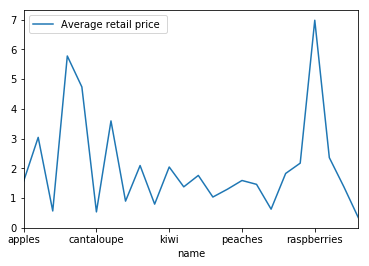

In [318]:
import matplotlib
import matplotlib.pyplot as plt
# use plot
fresh_fruit.plot(x="name",y="Average retail price ",kind="line")
plt.show()

<b><p>2.How do the price distributions compare for fruit and vegetables?</p></b>

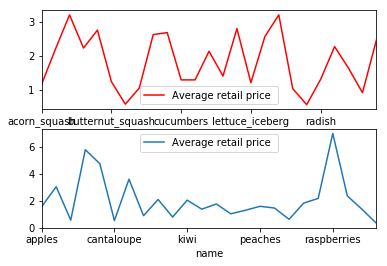

In [326]:
f, a = plt.subplots(2,1)
fresh.xs("vegetables").plot(x="name",y="Average retail price ",kind="line",ax=a[0],color="red")
fresh.xs("fruits").plot(x="name",y="Average retail price ",kind="line",ax=a[1])
plt.show()

<p> The plot above is vegetables, the plot in the bottom is fruits. By comparing there values we can know that fruits' price are ranging from 0-6+. However, most vegetables' price are ranging from 0-3. Thus, fruits are comparatively more expensive.</p>

<b><p>3.Which foods are the best value for the price?</p><b>

In [339]:
# use 'Average price per cup equivalent'  as the standard for best value
print fresh.iloc[:,0].idxmax()

('vegetables', 2)


In [344]:
veg = fresh.ix["vegetables"]
veg.iloc[2,5]

'asparagus'

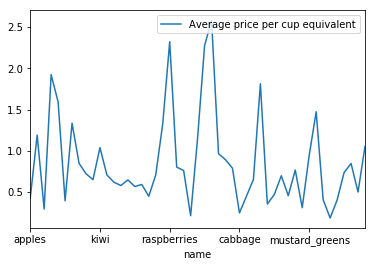

In [346]:
fresh.plot(x="name",y="Average price per cup equivalent",kind="line")
plt.show()

<p> Asparagus are the best value for the price among all the food.</p>

<b><p>4.What's something surprising about this data set?</p><b>

In [348]:
# the average price for asparagus
fresh.loc[fresh["name"] =="asparagus"]

,,Average price per cup equivalent,Average retail price,Form,Preparation yield factor,Size of a cup equivalent,name,price unit
vegetables,2,2.58227,3.21349,Fresh1,0.493835,0.396832,asparagus,per pound


In [349]:
# the average price for asparagus
fresh.loc[fresh["name"] =="raspberries"]

,,Average price per cup equivalent,Average retail price,Form,Preparation yield factor,Size of a cup equivalent,name,price unit
fruits,20,2.32287,6.97581,Fresh1,0.96,0.31967,raspberries,per pound


<p> Even though average retail price of raspberries are twice of the price of asparagus, 
asparagus have the best value price. This may tell us the price of raspberries should not be 
as high as they are now.</p>

<b><p>5.Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis</p><b>

<p>Based on the plots and data we have and our common sense, comparing with fruits, vegetables should provide lower price, higher yield and pretty much the same nutrition. </p>